# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Syarafat Syazwan
- **Email:** syarafatsyazwan36@gmail.com
- **ID Dicoding:** M172B4KY4260

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda harian berdasarkan musim, hari kerja, dan cuaca?
- Bagaimana pengaruh variabel cuaca dan suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset bike sharing
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan 5 baris pertama dari dataset day
day_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# Informasi mengenai kolom dan tipe data
day_data.info()

# Memeriksa apakah ada nilai yang hilang
day_data.isnull().sum()

# Menampilkan statistik dasar data
day_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset tidak memiliki missing values.
- Ada beberapa variabel dengan nilai yang di-normalisasi (misalnya temp, hum), yang bisa diproses lebih lanjut.

### Cleaning Data

In [5]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Mapping kolom season menjadi nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season'] = day_data['season'].map(season_mapping)

# Mapping kolom weekday menjadi nama hari
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_data['weekday'] = day_data['weekday'].map(weekday_mapping)

# Menampilkan 5 baris pertama dari data yang sudah dibersihkan
day_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom dteday telah diubah ke format datetime.
- Kolom season dan weekday sudah diubah menjadi kategori yang lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

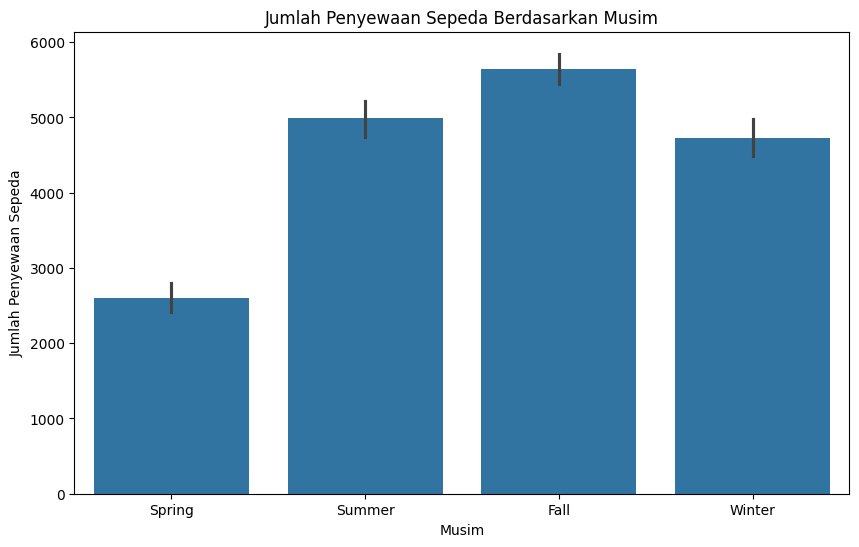

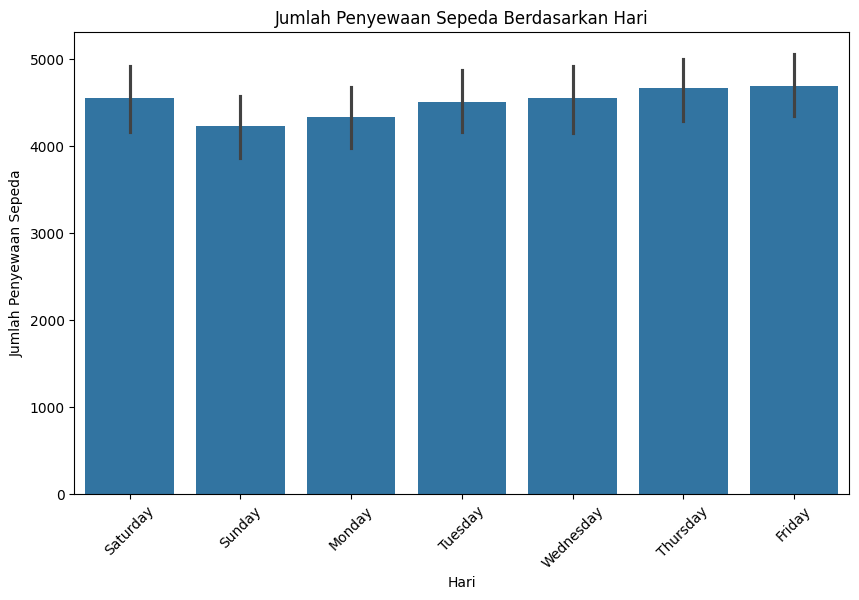

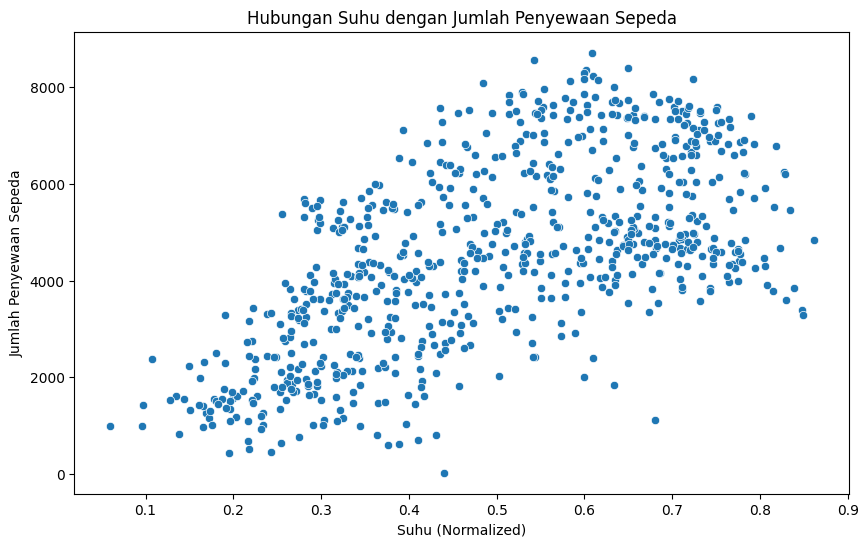

In [8]:
# Visualisasi penyewaan berdasarkan musim
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=day_data)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.show()

# Visualisasi penyewaan berdasarkan hari
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', data=day_data)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Hari')
plt.xticks(rotation=45)
plt.show()

# Visualisasi scatter plot hubungan suhu dan jumlah penyewaan
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.show()


**Insight:**
- Jumlah penyewaan sepeda cenderung lebih tinggi pada musim panas.
- Ada pola peningkatan penyewaan sepeda pada hari akhir pekan.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, di mana lebih banyak penyewaan terjadi pada suhu yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan musim dan hari?

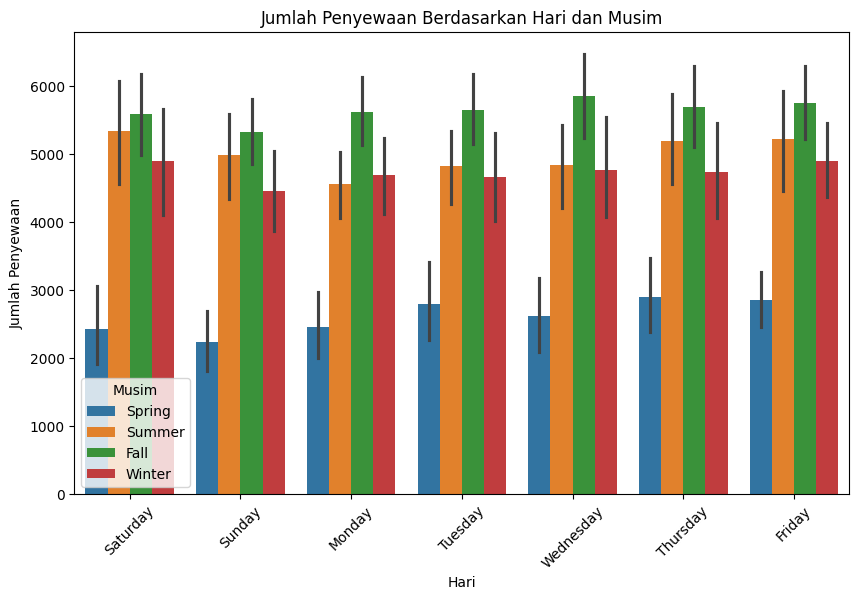

In [9]:
# Visualisasi gabungan antara musim dan hari
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', hue='season', data=day_data)
plt.title('Jumlah Penyewaan Berdasarkan Hari dan Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Hari')
plt.xticks(rotation=45)
plt.legend(title='Musim')
plt.show()


### Pertanyaan 2: Bagaimana pengaruh variabel cuaca dan suhu terhadap jumlah penyewaan sepeda?

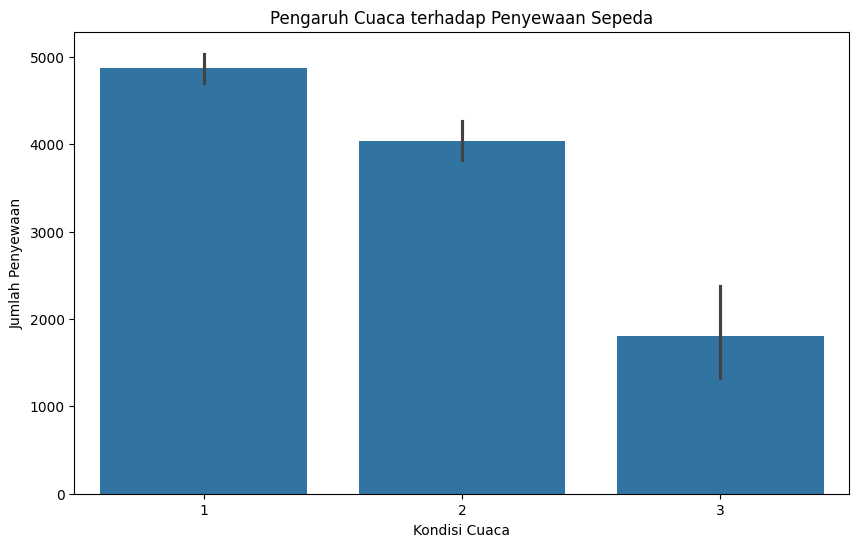

In [10]:
# Visualisasi hubungan cuaca dan penyewaan sepeda
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2